***Notebook by Daniyal Nathani***

# Image classification using CNNs
______

## Description

Data Description: 
You are provided with a  dataset  of  images of  plant seedlings at various stages of  grown. Each image has a filename that is its 
unique id. 

The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's 
species from a photo.

Can you differentiate a weed from a crop seedling?  
The ability to do so effectively can mean better crop yields and better stewardship of the environment.  


## Objective:

The main objective of the project is to: Build a CNN classifier that can determine what species a seedling is based on the image.

## Objective Insight and Analysis

We can effectively yield better crop results and maintain the environment if we can determine what kind of plant is growing from a picture!

## Data Description
The dataset can be download from Olympus. 
The data file names are: 
- images.npy 
- Label.csv 

# Let's get to the fun!

# Importing Libraries

In [1]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.preprocessing.image import ImageDataGenerator

# Loading the Data

In [2]:
img_array = np.load('images.npy')

In [3]:
labels = pd.read_csv("Labels.csv")

# Quick analysis on data shapes

In [4]:
print('Shape of image array data is: ', img_array.shape)

print('Min and Max values are: ', img_array.min(), ' - ', img_array.max())

print('\n\nShape of labels data is: ', labels.shape)

Shape of image array data is:  (4750, 128, 128, 3)
Min and Max values are:  0  -  255


Shape of labels data is:  (4750, 1)


> There are 4750 pictures with the height, weight, and depth accordingly

> The labels data has one column that describes the type of plant seedling it is

# Categorical Analysis - What species and how many of each?

In [5]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [6]:
labels.isnull().sum()

Label    0
dtype: int64

> Had to check to for nulls!

In [7]:
categories = labels.Label.unique()
categories

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

<AxesSubplot:xlabel='Label'>

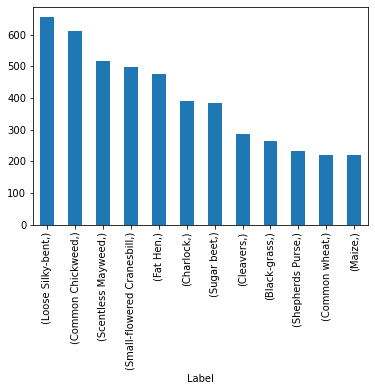

In [8]:
labels.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

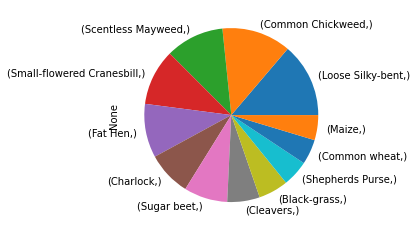

In [9]:
labels.value_counts().plot(kind='pie')

These two graphs show us the distribution of the different seedling categories. They aren't too imbalanced but there is some slight imbalance with Loose Silky beny and Maize types.

# Random Pictures visualized

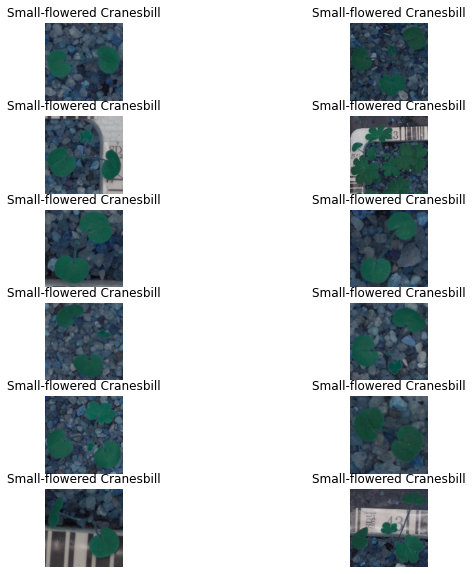

In [10]:
figure = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(6, 2, i + 1)
    plt.axis("off")
    plt.title(labels.iloc[i][0])# labels.['Label'][i]
    plt.imshow(img_array[i].squeeze())

# Visualizing an Image from Each Category

This seedling is a Small-flowered Cranesbill


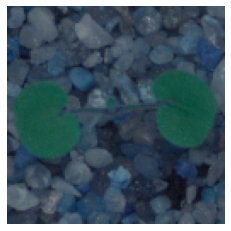

This seedling is a Fat Hen


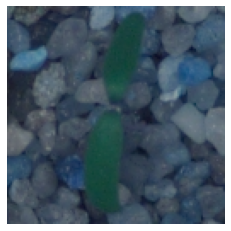

This seedling is a Shepherds Purse


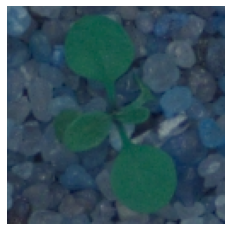

This seedling is a Common wheat


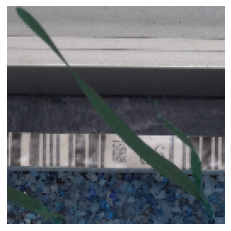

This seedling is a Common Chickweed


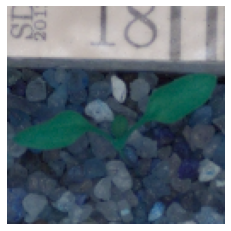

This seedling is a Charlock


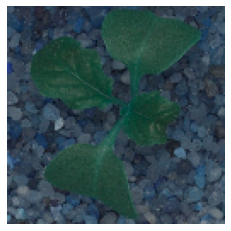

This seedling is a Cleavers


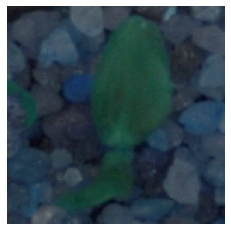

This seedling is a Scentless Mayweed


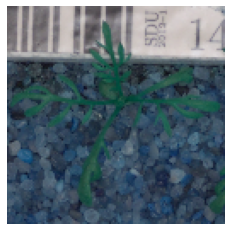

This seedling is a Sugar beet


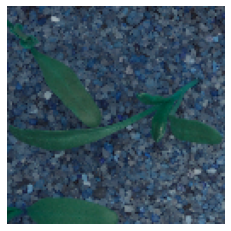

This seedling is a Maize


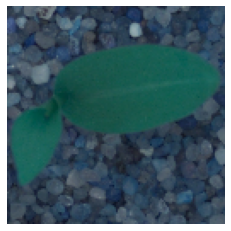

This seedling is a Black-grass


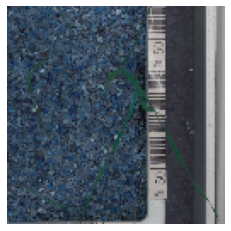

This seedling is a Loose Silky-bent


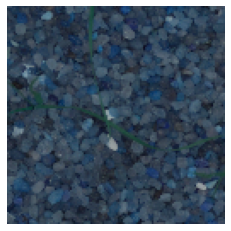

In [11]:
prev_label = ' '
for i in range(len(labels)):
  label = labels.iloc[i][0]
  if label != prev_label:
    img = img_array[i]
    print('This seedling is a', label)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    prev_label = label

In [12]:
num_categories = len(categories)
num_categories

12

> There are 12 categories. We need to keep this in mind as we need to make sure the shapes are all correct and the CNN has the right number of outputs!

## Plotting the Mean Image of each category!

In [13]:
idx_sfc = labels.index[labels['Label'] == 'Small-flowered Cranesbill'].tolist()
idx_fathen = labels.index[labels['Label'] == 'Fat Hen'].tolist()
idx_shepherds = labels.index[labels['Label'] == 'Shepherds Purse'].tolist()
idx_wheat = labels.index[labels['Label'] == 'Common wheat'].tolist()
idx_chickweed = labels.index[labels['Label'] == 'Common Chickweed'].tolist()
idx_charlock = labels.index[labels['Label'] == 'Charlock'].tolist()
idx_cleaver = labels.index[labels['Label'] == 'Cleavers'].tolist()
idx_mayweed = labels.index[labels['Label'] == 'Scentless Mayweed'].tolist()
idx_sugarbeet = labels.index[labels['Label'] == 'Sugar beet'].tolist()
idx_maize = labels.index[labels['Label'] == 'Maize'].tolist()
idx_blkgrass = labels.index[labels['Label'] == 'Black-grass'].tolist()
idx_loosesb = labels.index[labels['Label'] == 'Loose Silky-bent'].tolist()

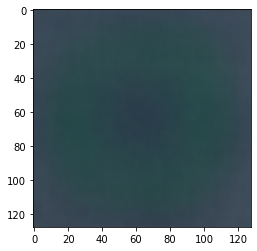

In [14]:
mean_sfc = img_array[idx_sfc].mean(axis=0)
plt.imshow(mean_sfc.astype(np.uint8))

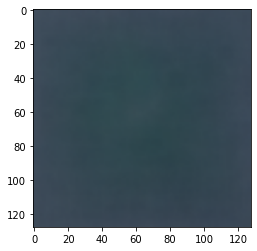

In [15]:
mean_fathen = img_array[idx_fathen].mean(axis=0)
plt.imshow(mean_fathen.astype(np.uint8))

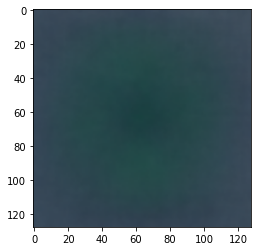

In [16]:
mean_shepherds = img_array[idx_shepherds].mean(axis=0)
plt.imshow(mean_shepherds.astype(np.uint8))

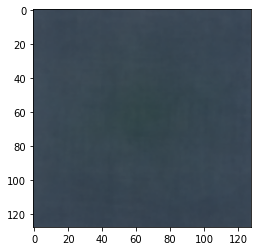

In [17]:
mean_wheat = img_array[idx_wheat].mean(axis=0)
plt.imshow(mean_wheat.astype(np.uint8))

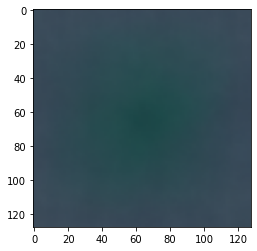

In [18]:
mean_chickweed = img_array[idx_chickweed].mean(axis=0)
plt.imshow(mean_chickweed.astype(np.uint8))

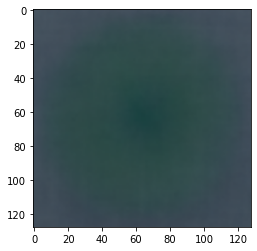

In [19]:
mean_charlock = img_array[idx_charlock].mean(axis=0)
plt.imshow(mean_charlock.astype(np.uint8))

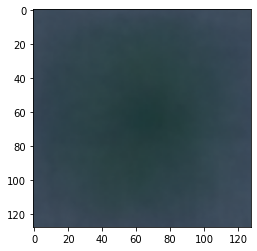

In [20]:
mean_cleaver = img_array[idx_cleaver].mean(axis=0)
plt.imshow(mean_cleaver.astype(np.uint8))

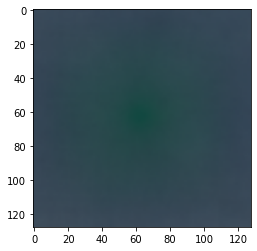

In [21]:
mean_mayweed = img_array[idx_mayweed].mean(axis=0)
plt.imshow(mean_mayweed.astype(np.uint8))

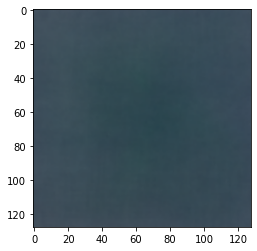

In [22]:
mean_sugarbeet = img_array[idx_sugarbeet].mean(axis=0)
plt.imshow(mean_sugarbeet.astype(np.uint8))

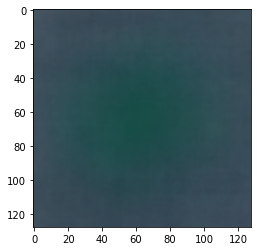

In [23]:
mean_maize = img_array[idx_maize].mean(axis=0)
plt.imshow(mean_maize.astype(np.uint8))

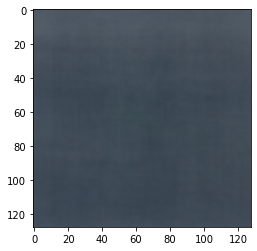

In [24]:
mean_blkgrass = img_array[idx_blkgrass].mean(axis=0)
plt.imshow(mean_blkgrass.astype(np.uint8))

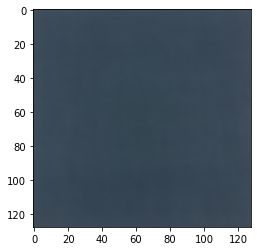

In [25]:
mean_loosesb = img_array[idx_loosesb].mean(axis=0)
plt.imshow(mean_loosesb.astype(np.uint8))

> The mean images of each class seem to be so blurry. I would assume it is because of the background contributing to the average image while it is not a major part of what needs to be evaluated. We can see how certain categories show more green, different shades of green, and we are also able to make out some shapes.

> These are features that can be used when applying different preprocessing and data augmentation methods to really fine tune the model to the best client needs.

# Preprocessing the Image - Blurring and Normalization

## Gaussian Blurring

In [26]:
blurred_images=[]
for i in range(len(img_array)):
    blurred_images.append(cv2.GaussianBlur(img_array[i], (5, 5), 0))  
blurred_images=np.array(blurred_images)
blurred_images.shape

(4750, 128, 128, 3)

## Normalization

In [27]:
img_array_norm = blurred_images.astype('float32') / 255.0

In [28]:
print('Shape of normalized blurred image array:', img_array_norm.shape)
print('Min and Max values are: ', img_array_norm.min(), ' - ', img_array_norm.max())


Shape of normalized blurred image array: (4750, 128, 128, 3)
Min and Max values are:  0.0  -  1.0


## Visualization after Processing

This seedling is a Small-flowered Cranesbill


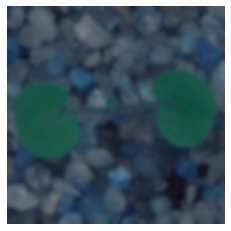

This seedling is a Fat Hen


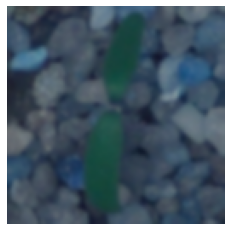

This seedling is a Shepherds Purse


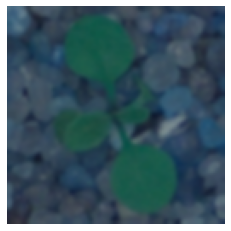

This seedling is a Common wheat


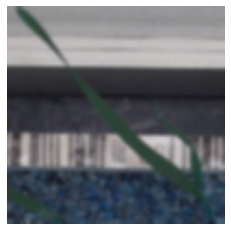

This seedling is a Common Chickweed


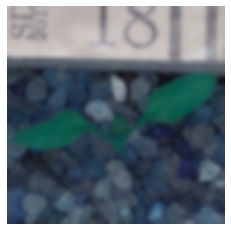

This seedling is a Charlock


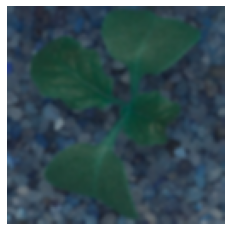

This seedling is a Cleavers


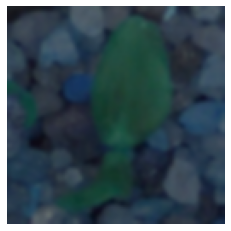

This seedling is a Scentless Mayweed


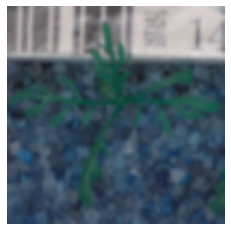

This seedling is a Sugar beet


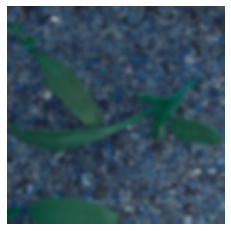

This seedling is a Maize


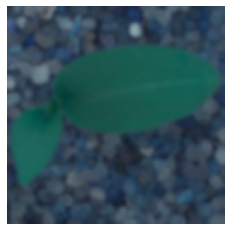

This seedling is a Black-grass


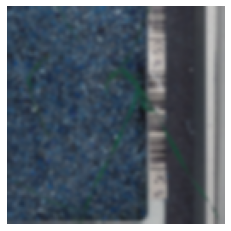

This seedling is a Loose Silky-bent


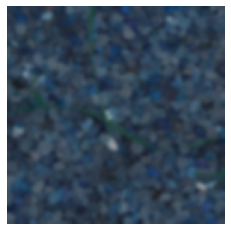

In [29]:
cur_label = ' '
for i in range(len(labels)):
  label = labels.iloc[i][0]
  if label != cur_label:
    img = img_array_norm[i]
    print('This seedling is a', label)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    cur_label = label

> We can see how the blurring and normalization make a difference after the preprocessing on the image. Let's move along to preprocess the categories!

# Making Data Compatible

## Categorical Encoder for Labels

In [30]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [31]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(labels)
print("Classes: " + str(le.classes_))
labels_encoded = le.transform(labels) # This will give a number based on the category

# Make labels categorical
labels_encoded2 = to_categorical(labels_encoded, num_classes=12) # This will actually return a one-hot-encoded type of vector

print("Shape of y_train:", labels_encoded2.shape)
print("One value of y_train:", labels_encoded2[0])


Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


C:\Users\daniy\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


> We can see the shape remained the same

In [32]:
labels['label_number'] = labels_encoded
labels 

,Label,label_number
0,Small-flowered Cranesbill,10
1,Small-flowered Cranesbill,10
2,Small-flowered Cranesbill,10
3,Small-flowered Cranesbill,10
4,Small-flowered Cranesbill,10
...,...,...
4745,Loose Silky-bent,6
4746,Loose Silky-bent,6
4747,Loose Silky-bent,6
4748,Loose Silky-bent,6


> Just added the label number for my own knowledge

# Model Preparation

## Splitting the Data

In [33]:
X_train,X_test,y_train,y_test = train_test_split(img_array_norm,labels_encoded2,test_size=0.3,random_state=24)

### Checking the shape to make sure it's compatible

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


> Distributions seem good and shapes are compatible for the CNN model!

# Model Building and Evaluation

## Model 1 - Building CNN

In [35]:
model = keras.Sequential()
# Block 1
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3), name='Conv_1'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.1))
# Block 2
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation="relu", name='Conv_2'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.1))
# Block 3
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu", name='Conv_3'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.1))
# Block 4
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu", name='Conv_4'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.3))
# Block 5
model.add(keras.layers.GlobalMaxPooling2D())
model.add(keras.layers.Dense(512, activation="relu", name='dense_1'))
model.add(keras.layers.Dense(256, activation="relu", name='dense_2'))
model.add(keras.layers.Dense(12, activation="softmax", name='output'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
# compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

> Need to fit it now, using a validation split of 30% of the train

In [36]:
%%time

history = model.fit(x=X_train, y=y_train, batch_size=45, epochs=25, validation_split = 0.3)

Epoch 1/25
52/52 [==============================] - 8s 60ms/step - loss: 2.3965 - accuracy: 0.2368 - val_loss: 2.4893 - val_accuracy: 0.0381
Epoch 2/25
52/52 [==============================] - 2s 38ms/step - loss: 1.7108 - accuracy: 0.4254 - val_loss: 2.4980 - val_accuracy: 0.0381
Epoch 3/25
52/52 [==============================] - 2s 38ms/step - loss: 1.4087 - accuracy: 0.5367 - val_loss: 2.5140 - val_accuracy: 0.0952
Epoch 4/25
52/52 [==============================] - 2s 39ms/step - loss: 1.2782 - accuracy: 0.5660 - val_loss: 2.5382 - val_accuracy: 0.0962
Epoch 5/25
52/52 [==============================] - 2s 39ms/step - loss: 1.1529 - accuracy: 0.6094 - val_loss: 2.5456 - val_accuracy: 0.1834
Epoch 6/25
52/52 [==============================] - 2s 38ms/step - loss: 1.1124 - accuracy: 0.6261 - val_loss: 2.5136 - val_accuracy: 0.1844
Epoch 7/25
52/52 [==============================] - 2s 38ms/step - loss: 1.0137 - accuracy: 0.6601 - val_loss: 2.4512 - val_accuracy: 0.2705
Epoch 8/25
52

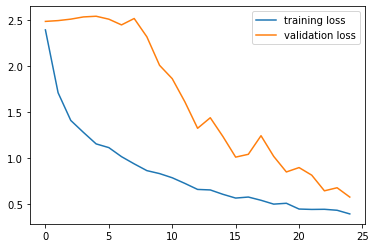

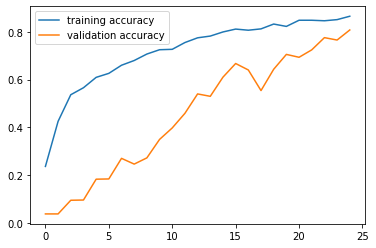

In [37]:
# plot training history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

The validation and training accuracy is relatively close as the epochs cross 15 with some validation loss spikes around 17 and slightly at 24 epochs.

In [38]:
scores = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 1s 12ms/step - loss: 0.6027 - accuracy: 0.8225
Test loss: 0.602675199508667
Test accuracy: 0.8224561214447021


> The model is fitting relatively well even with the test data

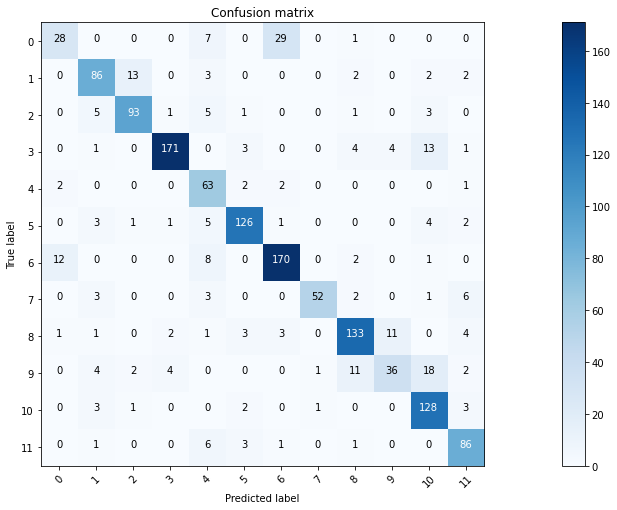

In [39]:
plt.subplots(figsize=(22,7))

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

> The confusion matrix shows us the predicted vs true labels. We can see the ones we predicted correctly more often as well- being labels 3 and 6.

> Let's move forward and change the architechture to see if we can get better results.

## Different architecure to get better accuracy!

In [40]:
# Model 2
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model1.add(BatchNormalization(axis=3))
model1.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model1.add(BatchNormalization(axis=3))
model1.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(BatchNormalization(axis=3))
model1.add(Dropout(0.1))

model1.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model1.add(BatchNormalization(axis=3))
model1.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(BatchNormalization(axis=3))
model1.add(Dropout(0.1))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(12, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
# compile model
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 56, 56, 128)      

> Let's fit it!

In [41]:
%%time

history1 = model1.fit(x=X_train, y=y_train, batch_size=45, epochs=25, validation_split = 0.3)

Epoch 1/25
52/52 [==============================] - 17s 231ms/step - loss: 2.3236 - accuracy: 0.3610 - val_loss: 3.1908 - val_accuracy: 0.1002
Epoch 2/25
52/52 [==============================] - 7s 144ms/step - loss: 1.2435 - accuracy: 0.6132 - val_loss: 5.4389 - val_accuracy: 0.1002
Epoch 3/25
52/52 [==============================] - 7s 143ms/step - loss: 0.9370 - accuracy: 0.7013 - val_loss: 6.5944 - val_accuracy: 0.1894
Epoch 4/25
52/52 [==============================] - 7s 143ms/step - loss: 0.6753 - accuracy: 0.7821 - val_loss: 6.7980 - val_accuracy: 0.1463
Epoch 5/25
52/52 [==============================] - 7s 143ms/step - loss: 0.5432 - accuracy: 0.8255 - val_loss: 8.3810 - val_accuracy: 0.1473
Epoch 6/25
52/52 [==============================] - 7s 144ms/step - loss: 0.4142 - accuracy: 0.8659 - val_loss: 9.8148 - val_accuracy: 0.1473
Epoch 7/25
52/52 [==============================] - 7s 144ms/step - loss: 0.3173 - accuracy: 0.8934 - val_loss: 11.2804 - val_accuracy: 0.1473
Epoc

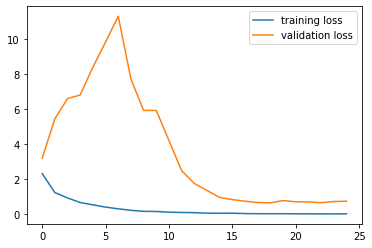

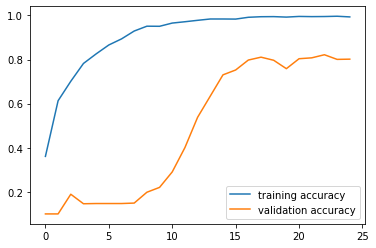

In [42]:
# plot training history
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

> The validation data is underfit on the model so we can predict the final results will also show a model that is overfit!

In [43]:
scores1 = model1.evaluate(X_test, y_test, verbose=1)

print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])

45/45 [==============================] - 2s 52ms/step - loss: 0.7634 - accuracy: 0.7937
Test loss: 0.7633888721466064
Test accuracy: 0.793684184551239


> As predicted, our training accuracy is above 99% while our test accuracy is much lower in comparison at about 79%.

Let's take a quick look at the confusion matrix and see if we can improve our model through data augmentation!

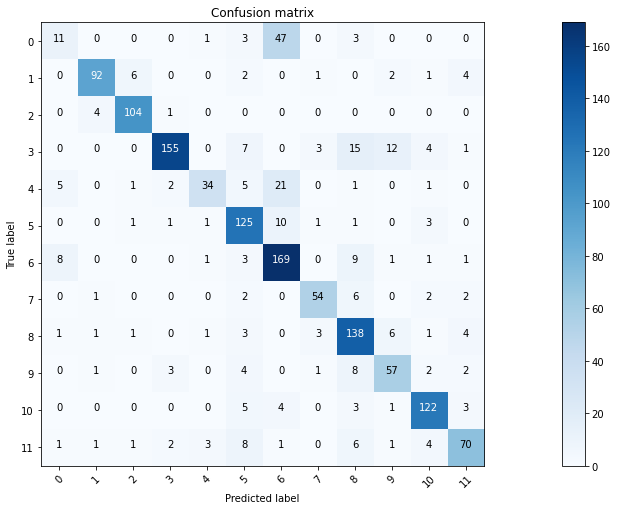

In [44]:
plt.subplots(figsize=(22,7))

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

> As we can see with a comparison with the first model's confusion matrix, there are lower numbers by a small bit but we know that the train vs test accuracy results have a large difference meaning an overfit model!!

## Apply data augmentation to help overfit modeling behavior

Using Image Data Generator to apply different augmentations to help with predictions

In [45]:
X_train_idg = X_train
datagen = ImageDataGenerator(
        rotation_range = 180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train_idg)

In [46]:
# Model 3 - same as model 2 with image data generator
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model2.add(BatchNormalization(axis=3))
model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model2.add(BatchNormalization(axis=3))
model2.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization(axis=3))
model2.add(Dropout(0.1))

model2.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model2.add(BatchNormalization(axis=3))
model2.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization(axis=3))
model2.add(Dropout(0.1))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(12, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
# compile model
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_10 (Batc (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 128)      

> Let's fit and evaluate. 

In [47]:
%%time

history2 = model2.fit(x=X_train_idg, y=y_train, batch_size=45, epochs=25, validation_split = 0.3)

Epoch 1/25
52/52 [==============================] - 8s 147ms/step - loss: 2.1947 - accuracy: 0.3782 - val_loss: 3.1396 - val_accuracy: 0.1002
Epoch 2/25
52/52 [==============================] - 8s 145ms/step - loss: 1.1945 - accuracy: 0.6188 - val_loss: 6.4237 - val_accuracy: 0.1002
Epoch 3/25
52/52 [==============================] - 8s 145ms/step - loss: 0.8747 - accuracy: 0.7190 - val_loss: 5.4915 - val_accuracy: 0.1002
Epoch 4/25
52/52 [==============================] - 8s 146ms/step - loss: 0.6339 - accuracy: 0.7860 - val_loss: 6.3097 - val_accuracy: 0.1002
Epoch 5/25
52/52 [==============================] - 8s 146ms/step - loss: 0.4643 - accuracy: 0.8474 - val_loss: 8.1275 - val_accuracy: 0.1473
Epoch 6/25
52/52 [==============================] - 8s 145ms/step - loss: 0.4013 - accuracy: 0.8633 - val_loss: 6.8838 - val_accuracy: 0.1483
Epoch 7/25
52/52 [==============================] - 8s 147ms/step - loss: 0.2839 - accuracy: 0.9123 - val_loss: 6.6474 - val_accuracy: 0.1473
Epoch 

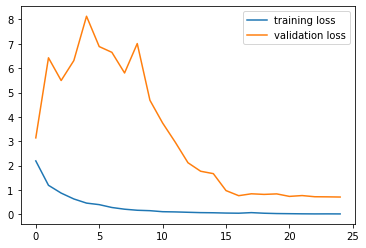

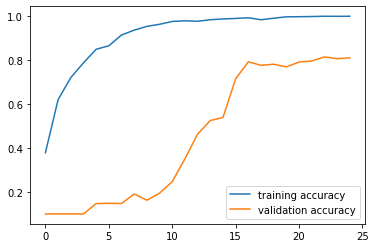

In [48]:
# plot training history
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

> Not MUCH different results but let's approach the test accuracy with the same mindset of it being overfit because we see that in the validation set. 

In [49]:
scores2 = model2.evaluate(X_test, y_test, verbose=1)

print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

45/45 [==============================] - 1s 24ms/step - loss: 0.6851 - accuracy: 0.8281
Test loss: 0.6851478815078735
Test accuracy: 0.8280701637268066


> While the test accuracy increased a small bit, the model is still overfitting on the training data. The Image Data Generator did help with predictions to an extent but not enough. Let's look at the confusion matrix!

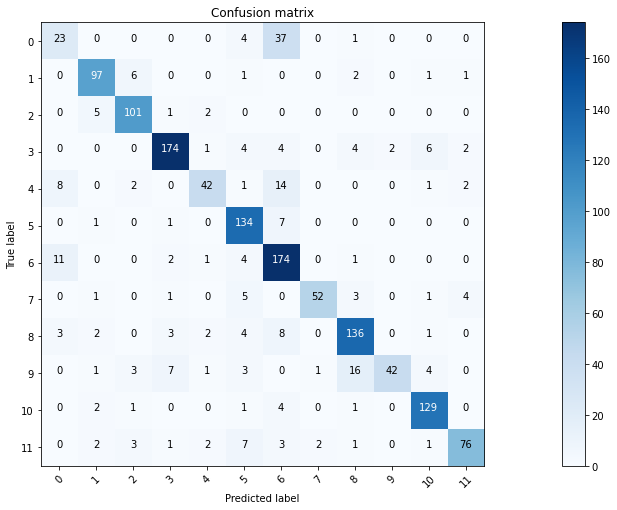

In [50]:
plt.subplots(figsize=(22,7))

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model2.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

> We can see how the results were affected by a small margin. It is very interesting to see how the different classifications are predicted differently with each model.

# Conclusion

CNNs take the entire image as input in order to perform feature extraction. So **CNNs do not lose the image's spatial structure!**

We can use the models made here with the multiple block layers contributing to the entire model. We can see with the first model, we have about an 80% accuracy on both test and training sets without data augmentation! This model can be used with a decent confidence going forward with the seedling classification process.

While there is definitely room for improvement with finding a better fit model with the best metrics, the initial model we made had the best results with test, train, and validation sets giving accuracy results of within 3% of each other.

 **Different architectures** can be built, **hyperparamter tuning** can be performed, and more **data augmentation** can be applied to obtain a better seedling classifier! Prebuilt proven models can also be used in evaluation!

We can visualize the filters and understand why the model does not do well in the identification of certain categories of seedlings. 